## Observations and Insights

# Comments about the data
## (1) Not all samples are the same so that could affect the statistics calculation

## (2) The line graph show clearly that capomulin has an clear effect on reducing the tummor size

## (3) There are no outliers for the data of the most effective medicines

## Dependencies and starter code

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy import stats

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [93]:
# Combine the data into a single dataset
data = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
data = pd.DataFrame(data)
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [94]:
data2 = data["Drug Regimen"]
data2.value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

## Summary statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

dataAgg = data.groupby("Drug Regimen")
dataAgg = data.agg({
    "Tumor Volume (mm3)" : ["mean", "median", "std"]
})

dataAgg["Tumor Volume (mm3)"] = dataAgg["Tumor Volume (mm3)"].map("{:,.2f}".format)

dataAgg.head()

#data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
#data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

,Tumor Volume (mm3)
mean,50.45
median,48.95
std,8.89


In [96]:
mean = pd.DataFrame(data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
median = pd.DataFrame(data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
std = pd.DataFrame(data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
sem = pd.DataFrame(data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

meanmedian = pd.merge(mean, median, on = "Drug Regimen", how="outer")

dataAll = pd.merge(meanmedian, std, on = "Drug Regimen", how = "outer")
dataAll = pd.merge(dataAll, sem, on = "Drug Regimen", how = "outer")

dataAll.columns = ["Mean","Median","Std","Sem"]
dataAll["Mean"] = dataAll["Mean"].map("{:,.2f}".format)
dataAll["Median"] = dataAll["Median"].map("{:,.2f}".format)
dataAll["Std"] = dataAll["Std"].map("{:,.2f}".format)
dataAll["Sem"] = dataAll["Sem"].map("{:,.2f}".format)

dataAll

,Mean,Median,Std,Sem
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.32,50.85,6.51,0.51
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


## Bar plots

In [97]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

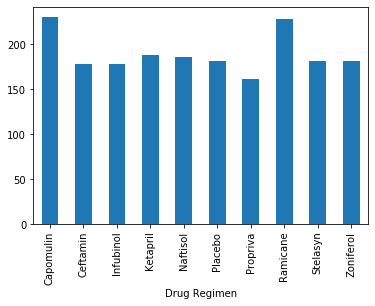

In [98]:
data.groupby("Drug Regimen")["Drug Regimen"].count().plot(kind="bar")
plt.show()

In [99]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

In [100]:
count = pd.DataFrame(data.groupby("Drug Regimen")["Drug Regimen"].count())
count.rename(columns={'Drug Regimen': "Count Drug Regimen" },inplace=True)
regimes = count.index.tolist()

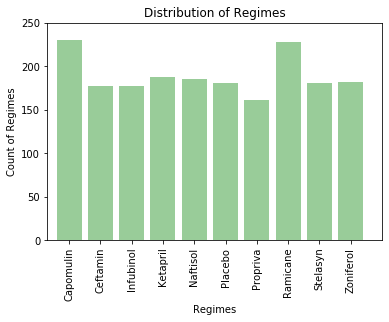

In [101]:
x_axis = np.arange(0, len(count))
plt.bar(x_axis,count["Count Drug Regimen"], color = "g", alpha = 0.4)
plt.xticks(x_axis, regimes, rotation = "vertical")
plt.xlim(-0.7, len(x_axis))
plt.ylim(0, 250)
plt.title("Distribution of Regimes")
plt.xlabel("Regimes")
plt.ylabel("Count of Regimes")
plt.show()

## Pie plots

In [102]:
gender = pd.DataFrame(data.groupby("Sex")["Sex"].count())
gender.rename(columns={'Sex': "Mouse Gender" },inplace=True)
labels =gender.index.tolist()
colors = ["lightcoral", "lightskyblue"]
explode = (0, 0)
gender.reset_index()


,Sex,Mouse Gender
0,Female,935
1,Male,958


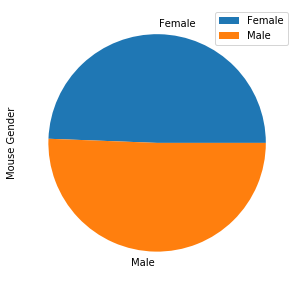

In [103]:
plot = gender.plot.pie(y='Mouse Gender', figsize=(5, 5))

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


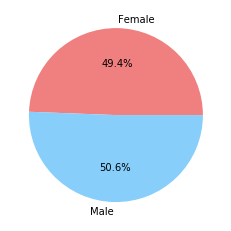

In [105]:
plt.pie(gender, labels=labels, colors= colors, explode= explode, autopct = "%1.1f%%")
plt.show()

## Quartiles, outliers and boxplots

In [106]:
# Calculate the final tumor volume of each mouse across 
#four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [107]:
pablo2 = data[data["Timepoint"] == 45].reset_index()
pablo2 = pablo2[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
pablo2
meanGeneral = pablo2["Tumor Volume (mm3)"].mean()
meanGeneral

pablo2

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472
...,...,...,...
125,y769,Ceftamin,68.594745
126,y865,Ceftamin,64.729837
127,z581,Infubinol,62.754451
128,z795,Naftisol,65.741070


In [108]:
#Capomulin Ramicane Ceftamin Infubinol
capomulin = pablo2[pablo2["Drug Regimen"] == "Capomulin"]

quartiles = capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqc = quartiles[.25]
upperqc = quartiles[.75]
iqrc = upperqc - lowerqc

lowerbc = lowerqc - (1.5* iqrc)
upperbc = upperqc + (1.5*iqrc)


outliers1 = capomulin[capomulin["Tumor Volume (mm3)"] < lowerbc]
outliers2 = capomulin[capomulin["Tumor Volume (mm3)"] > upperbc]                     
outliers = pd.merge(outliers1, outliers2, on="Mouse ID", how ="outer")

print(f"Lower quartile: {lowerqc}")
print(f"Upper quartile: {upperqc}")
print(f"Interquartile range : {iqrc}")
print(f"The median is : {quartiles[0.5]}")

print(f"Lower bound: {lowerbc}")
print(f"Upper bound: {upperbc}")
print(f"Total Outliers: {len(outliers)}")

#Capomulin Ramicane Ceftamin Infubinol
#capomulin.mean()

Lower quartile: 32.37735684
Upper quartile: 40.1592203
Interquartile range : 7.781863460000004
The median is : 37.31184577
Lower bound: 20.70456164999999
Upper bound: 51.83201549
Total Outliers: 0


In [109]:
#Ramicane Ceftamin Infubinol
ramicane = pablo2[pablo2["Drug Regimen"] == "Ramicane"]

quartiles = ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqr = quartiles[.25]
upperqr = quartiles[.75]
iqrr = upperqr - lowerqr

lowerbr = lowerqr - (1.5* iqrr)
upperbr = upperqr + (1.5*iqrr)


outliers1 = ramicane[ramicane["Tumor Volume (mm3)"] < lowerbr]
outliers2 = ramicane[ramicane["Tumor Volume (mm3)"] > upperbr]                     
outliers = pd.merge(outliers1, outliers2, on="Mouse ID", how ="outer")

print(f"Lower quartile: {lowerqr}")
print(f"Upper quartile: {upperqr}")
print(f"Interquartile range : {iqrr}")
print(f"The median is : {quartiles[0.5]}")

print(f"Lower bound: {lowerbr}")
print(f"Upper bound: {upperbr}")
print(f"Total Outliers: {len(outliers)}")
#ramicane

Lower quartile: 30.981175224999998
Upper quartile: 38.508305307499995
Interquartile range : 7.527130082499998
The median is : 34.848627300000004
Lower bound: 19.690480101250003
Upper bound: 49.79900043124999
Total Outliers: 0


In [110]:
#Ceftamin Infubinol
ceftamin = pablo2[pablo2["Drug Regimen"] == "Ceftamin"]

quartiles = ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqr = quartiles[.25]
upperqr = quartiles[.75]
iqrr = upperqr - lowerqr

lowerbr = lowerqr - (1.5* iqrr)
upperbr = upperqr + (1.5*iqrr)


outliers1 = ceftamin[ceftamin["Tumor Volume (mm3)"] < lowerbr]
outliers2 = ceftamin[ceftamin["Tumor Volume (mm3)"] > upperbr]                     
outliers = pd.merge(outliers1, outliers2, on="Mouse ID", how ="outer")

print(f"Lower quartile: {lowerqr}")
print(f"Upper quartile: {upperqr}")
print(f"Interquartile range : {iqrr}")
print(f"The median is : {quartiles[0.5]}")

print(f"Lower bound: {lowerbr}")
print(f"Upper bound: {upperbr}")
print(f"Total Outliers: {len(outliers)}")
#ramicane

Lower quartile: 61.43389223
Upper quartile: 67.52748237
Interquartile range : 6.093590140000003
The median is : 64.29983003
Lower bound: 52.29350701999999
Upper bound: 76.66786758
Total Outliers: 0


In [111]:
#Infubinol
infubinol = pablo2[pablo2["Drug Regimen"] == "Infubinol"]

quartiles = infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqr = quartiles[.25]
upperqr = quartiles[.75]
iqrr = upperqr - lowerqr

lowerbr = lowerqr - (1.5* iqrr)
upperbr = upperqr + (1.5*iqrr)


outliers1 = infubinol[infubinol["Tumor Volume (mm3)"] < lowerbr]
outliers2 = infubinol[infubinol["Tumor Volume (mm3)"] > upperbr]                     
outliers = pd.merge(outliers1, outliers2, on="Mouse ID", how ="outer")

print(f"Lower quartile: {lowerqr}")
print(f"Upper quartile: {upperqr}")
print(f"Interquartile range : {iqrr}")
print(f"The median is : {quartiles[0.5]}")

print(f"Lower bound: {lowerbr}")
print(f"Upper bound: {upperbr}")
print(f"Total Outliers: {len(outliers)}")


Lower quartile: 62.75445141
Upper quartile: 67.68556862
Interquartile range : 4.9311172099999965
The median is : 66.08306589
Lower bound: 55.35777559500001
Upper bound: 75.08224443499999
Total Outliers: 0


In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [112]:


# Get names of indexes for which column Age has value 30
indexNames = ["Capomulin", "Ramicane", "Ceftamin", "Infubinol"]
df = pablo2[pablo2["Drug Regimen"].isin(indexNames)]
df

means = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
means = means.tolist()

sem = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem = sem.tolist()
sem

Capomulin = df[df["Drug Regimen"] == "Capomulin"]
Capomulin = Capomulin["Tumor Volume (mm3)"].tolist()

Ramicane = df[df["Drug Regimen"] == "Ramicane"]
Ramicane = Ramicane["Tumor Volume (mm3)"].tolist()

Ceftamin = df[df["Drug Regimen"] == "Ceftamin"]
Ceftamin = Ceftamin["Tumor Volume (mm3)"].tolist()

Infubinol = df[df["Drug Regimen"] == "Infubinol"]
Infubinol = Infubinol["Tumor Volume (mm3)"].tolist()


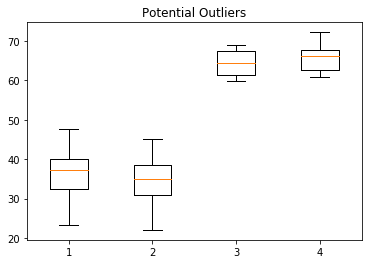

In [113]:

data2 = [Capomulin, Ramicane, Ceftamin, Infubinol]
fig7, ax7 = plt.subplots()
ax7.boxplot(data2)
ax7.set_title('Potential Outliers')
plt.show()

## Line and scatter plots

In [114]:
dataR = data[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)","Weight (g)"]]
capomulin = dataR[dataR["Drug Regimen"] == "Capomulin"]
capomulin = dataR[dataR["Mouse ID"] == "s185"]
capomulin.reset_index()
capomulin


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Weight (g)
10,s185,Capomulin,0,45.000000,17
11,s185,Capomulin,5,43.878496,17
12,s185,Capomulin,10,37.614948,17
13,s185,Capomulin,15,38.177232,17
14,s185,Capomulin,20,36.866876,17
15,s185,Capomulin,25,33.949940,17
16,s185,Capomulin,30,32.959671,17
17,s185,Capomulin,35,28.328531,17
18,s185,Capomulin,40,25.472143,17
19,s185,Capomulin,45,23.343598,17


In [115]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [116]:
time = pd.DataFrame(capomulin.groupby("Timepoint")["Tumor Volume (mm3)"].mean())
time = time.reset_index()
time

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,43.878496
2,10,37.614948
3,15,38.177232
4,20,36.866876
5,25,33.949940
6,30,32.959671
7,35,28.328531
8,40,25.472143
9,45,23.343598


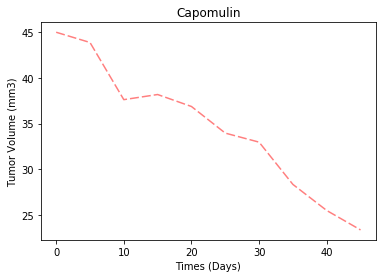

In [117]:
x_axis = time["Timepoint"].tolist()
y_axis = time["Tumor Volume (mm3)"].tolist()
plt.plot (x_axis, y_axis, color="r", alpha = 0.5,dashes=[6, 2])
plt.title("Capomulin")
plt.xlabel("Times (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


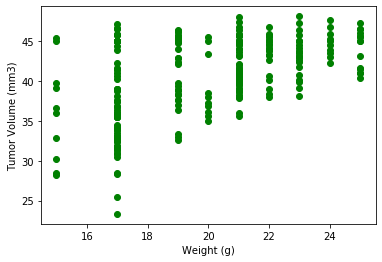

,Weight (g),Drug Regimen,Tumor Volume (mm3)
0,17,Capomulin,45.000000
1,17,Capomulin,43.878496
2,17,Capomulin,37.614948
3,17,Capomulin,38.177232
4,17,Capomulin,36.866876
...,...,...,...
225,24,Capomulin,47.685963
226,25,Capomulin,45.000000
227,25,Capomulin,45.597064
228,25,Capomulin,46.059608


In [118]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

pablo2 = data[data["Drug Regimen"] == "Capomulin"].reset_index()
pablo2 = pablo2[["Weight (g)", "Drug Regimen","Tumor Volume (mm3)"]]
pablo2

plt.scatter(pablo2.iloc[:,0],pablo2.iloc[:,2], color = "g")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
pablo2

In [85]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

In [119]:
Weight = pablo2["Weight (g)"]
Tumor = pablo2["Tumor Volume (mm3)"]

(v_slope1, v_int1, v_r1, v_p1, v_stderr1) = stats.linregress(Weight, Tumor)
#violent

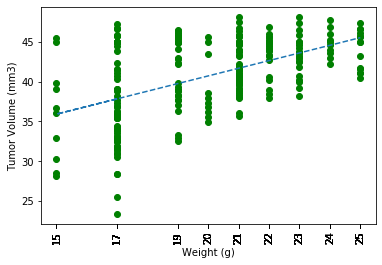

The correlation between both factors is 0.53


In [120]:
v_fit1 = v_slope1 * Weight + v_int1
plt.scatter(pablo2.iloc[:,0],pablo2.iloc[:,2], color = "g")
plt.plot(Weight, v_fit1, "--")
plt.xticks(Weight, rotation=90)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()
correlation = sts.pearsonr(Weight,Tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53
The r-squared is: 0.5256995552077172


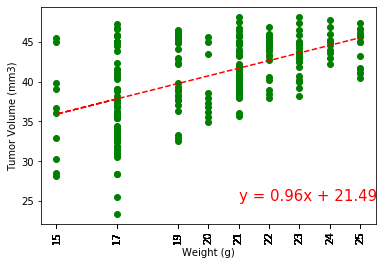

In [121]:
Weight = pablo2["Weight (g)"]
Tumor = pablo2["Tumor Volume (mm3)"]

(v_slope1, v_int1, rvalue, v_p1, v_stderr1) = stats.linregress(Weight, Tumor)
v_fit1 = v_slope1 * Weight + v_int1

plt.scatter(pablo2.iloc[:,0],pablo2.iloc[:,2], color = "g")

plt.plot(Weight, v_fit1, "r--")
plt.xticks(Weight, rotation=90)
line_eq = "y = " + str(round(v_slope1,2)) + "x + " + str(round(v_int1,2))
plt.annotate(line_eq,(21,25),fontsize=15,color="red")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")


correlation = sts.pearsonr(Weight,Tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue}")
plt.show()